# Assignment: Preparing Data for Analysis (Modified Titanic)

![](https://github.com/kaopanboonyuen/2110446_DataScience_2021s2/raw/main/%20files/hw.png)

In [894]:
#Import the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


In [895]:
df = pd.read_csv('https://github.com/kaopanboonyuen/2110446_DataScience_2021s2/raw/main/datasets/hw/titanic_training_dataset_v2.csv')

In [896]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,71.2833,C85,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,NaN,S


In [897]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     865 non-null    float64
 2   Pclass       828 non-null    float64
 3   Name         866 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        858 non-null    float64
 7   Parch        891 non-null    int64  
 8   Ticket       852 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     803 non-null    object 
dtypes: float64(5), int64(2), object(5)
memory usage: 83.7+ KB


# 1) Load data & review the data

<font color='blue'>Q1) What is the shape of this dataset? (rows & columns)</font>

In [898]:
print(f"Q1 Shape of original dataset :  {df.shape}")
print(f"\trows={df.shape[0]}, columns={df.shape[1]}")


Q1 Shape of original dataset :  (891, 12)
	rows=891, columns=12


In [899]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     865 non-null    float64
 2   Pclass       828 non-null    float64
 3   Name         866 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        858 non-null    float64
 7   Parch        891 non-null    int64  
 8   Ticket       852 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     803 non-null    object 
dtypes: float64(5), int64(2), object(5)
memory usage: 83.7+ KB


In [900]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,865.000000,828.000000,714.000000,858.000000,891.000000,891.000000
mean,446.000000,0.383815,2.304348,29.699118,0.524476,0.381594,32.204208
std,257.353842,0.486595,0.836952,14.526497,1.115284,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


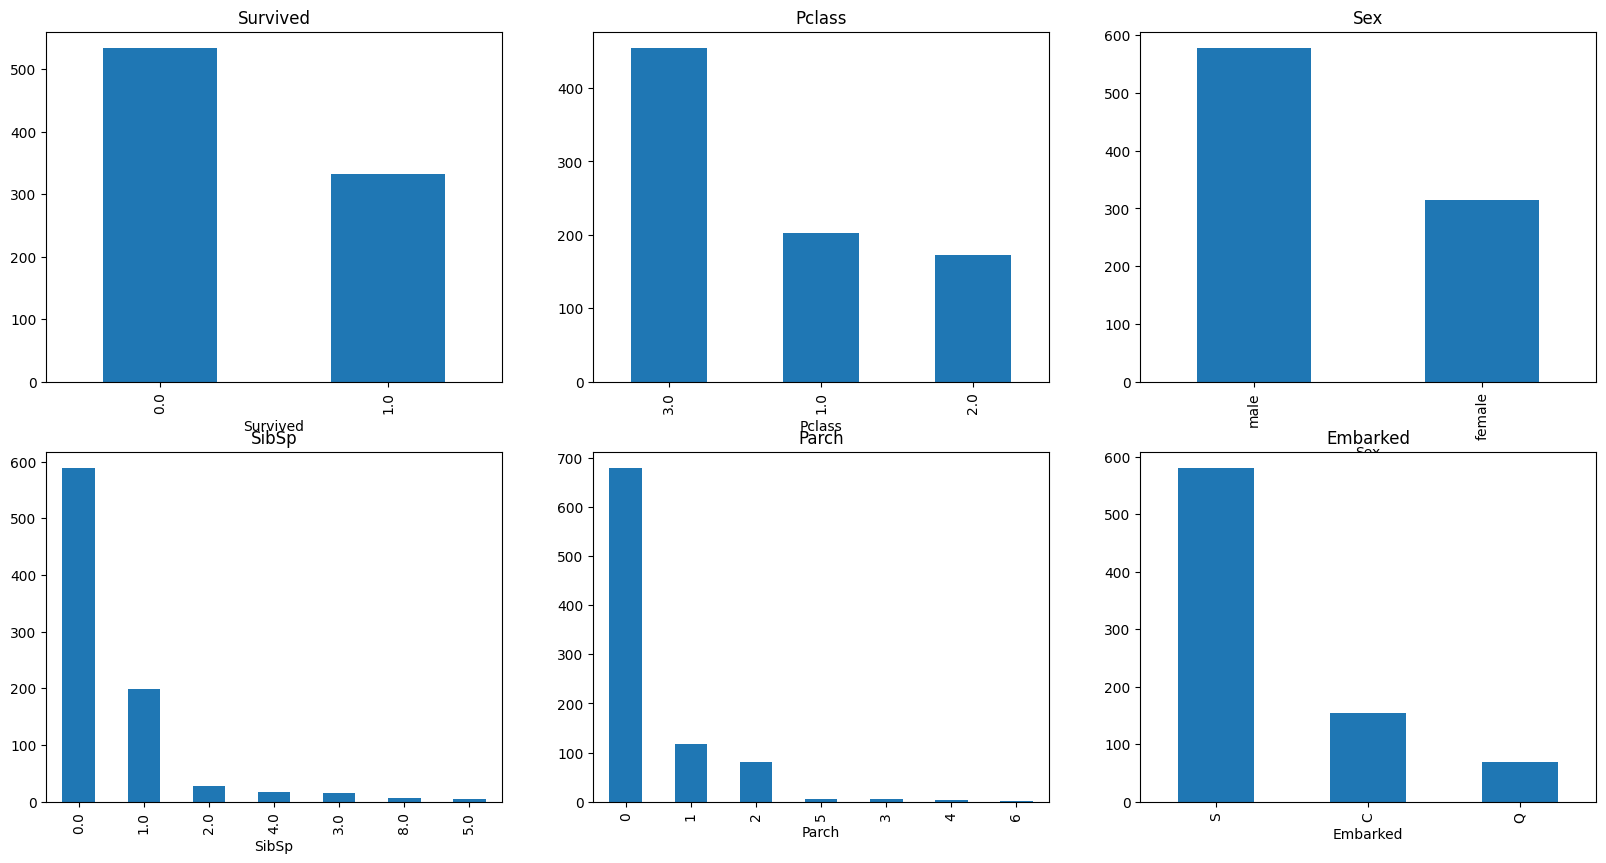

In [901]:

plt.figure(figsize=(20, 10))
plt_idx = 1
for col in df.columns:
    if len(df[col].unique()) < df.shape[0]*0.05:
        plt.subplot(2, 3, plt_idx)
        plt.title(col)
        df[col].value_counts().plot(kind='bar')
        plt_idx += 1


# 2) Drop unqualified variables

*   Drop variables with missing > 50%
*   Drop categorical variables with flat values > 70% (variables with the same value in the same column)

<font color='blue'>Q2) How many columns do we have left?</font>




In [902]:
temp_df = df.copy()

# Drop variable with missing > 50%
for col in temp_df.columns:
    missing_amt = temp_df[col].isnull().sum()
    missing_pct = 100*missing_amt/len(temp_df[col])
    print(f"Column {col} has {missing_amt} missing datapoints({missing_pct:.2}%)")
    if missing_pct > 50:
        temp_df.drop(columns=[col],
                     inplace=True)
        print(f"\t-Deleting {col} column")

# Drop categorical variables with flat values > 70% (variables with the same value in the same column)
for col in temp_df.columns:
    max_freq_amt = temp_df[col].value_counts().to_numpy()[0]
    max_freq_pct = 100*max_freq_amt/len(temp_df[col])
    print(f"Column {col} has {max_freq_amt} repeated datapoints({max_freq_pct:.2}%)")
    if max_freq_pct > 70:
        temp_df.drop(columns=[col],
                     inplace=True)
        print(f"\t-Deleting {col} column")

# show answer
print(f"Original shape : {df.shape}")
print(f"Processed shape : {temp_df.shape}")

Column PassengerId has 0 missing datapoints(0.0%)
Column Survived has 26 missing datapoints(2.9%)
Column Pclass has 63 missing datapoints(7.1%)
Column Name has 25 missing datapoints(2.8%)
Column Sex has 0 missing datapoints(0.0%)
Column Age has 177 missing datapoints(2e+01%)
Column SibSp has 33 missing datapoints(3.7%)
Column Parch has 0 missing datapoints(0.0%)
Column Ticket has 39 missing datapoints(4.4%)
Column Fare has 0 missing datapoints(0.0%)
Column Cabin has 687 missing datapoints(7.7e+01%)
	-Deleting Cabin column
Column Embarked has 88 missing datapoints(9.9%)
Column PassengerId has 1 repeated datapoints(0.11%)
Column Survived has 533 repeated datapoints(6e+01%)
Column Pclass has 454 repeated datapoints(5.1e+01%)
Column Name has 1 repeated datapoints(0.11%)
Column Sex has 577 repeated datapoints(6.5e+01%)
Column Age has 30 repeated datapoints(3.4%)
Column SibSp has 588 repeated datapoints(6.6e+01%)
Column Parch has 678 repeated datapoints(7.6e+01%)
	-Deleting Parch column
Colu

In [903]:
df = temp_df
print(f"Q2 Amount of column that we have : {len(df.columns)}")

Q2 Amount of column that we have : 10


# 3) Remove all rows with missing target (the variable "Survived")

<font color='blue'>Q3) How many rows do we have left?</font>

In [904]:
print(f"Amount of row that missing 'survived' : {df['Survived'].isnull().sum()}")
df.dropna(subset=['Survived'],
          inplace=True)
print(f"Q3 Amount of row that we have : {df.shape[0]}")

Amount of row that missing 'survived' : 26
Q3 Amount of row that we have : 865


# 4) Handle outliers 

For the variable “Fare”, replace outlier values with the boundary values


*   If value < (Q1 - 1.5IQR), relace with (Q1 - 1.5IQR)
*   If value > (Q3 + 1.5IQR), relace with (Q3 + 1.5IQR)

<font color='blue'>Q4) What is the mean of “Fare” after replacing the outliers (round 2 decimal points)?</font>



In [905]:
col = 'Fare'
Q1, Q3 = df[col].quantile([.25, .75]).to_numpy()
IQR = Q3-Q1

LOWER_BND = Q1-1.5*IQR
UPPER_BND = Q3+1.5*IQR

df.loc[df[col]<LOWER_BND, col] = LOWER_BND
df.loc[df[col]>UPPER_BND, col] = UPPER_BND

print(f"For column {col}")
print(f"\t- Q1 : {Q1}")
print(f"\t- Q3 : {Q3}")
print(f"\t- IQR : {IQR}, 1.5IQR : {1.5*IQR}")
print(f"\t- New max : {df[col].max()}")
print(f"\t- New min : {df[col].min()}")
print(f"Q4 mean of new 'Fare' : {df[col].mean():.2f}")


For column Fare
	- Q1 : 7.8958
	- Q3 : 31.0
	- IQR : 23.1042, 1.5IQR : 34.6563
	- New max : 65.6563
	- New min : 0.0
Q4 mean of new 'Fare' : 24.04


In [906]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,A/5 21171,7.2500,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,PC 17599,65.6563,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,STON/O2. 3101282,7.9250,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,113803,53.1000,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,211536,13.0000,S
887,888,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,112053,30.0000,S
888,889,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,W./C. 6607,23.4500,S
889,890,1.0,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,111369,30.0000,C


# 5) Impute missing value



*   Show the number of missing values in each variable
*   Impute missing values with mean & mode
*   Show the number of missing values again after missing value imputation

<font color='blue'>Q5) Which variable has the largest number of missing values?</font>



In [907]:
def show_n_missing():
    global df
    print(f"Amount of missing in each column")
    maxx_v, maxx_c = 0, None
    for col in df.columns:
        max_amt = df[col].isnull().sum()
        if maxx_v < max_amt:
            maxx_v = max_amt
            maxx_c = col
        print(f"\t{col:13} has {max_amt:3} missing value.")
    print(f"\t- Q5 Most missing value column is {maxx_c}")
# show before
show_n_missing()

# impute 
mean_cols = ['Age', ]
imp = SimpleImputer(missing_values=np.nan,
                    strategy='mean')
imp.fit(df[mean_cols])
df[mean_cols] = imp.transform(df[mean_cols])

fill_dict = {
    'Pclass' : df['Pclass'].mode()[0],
    'Name' : df['Name'].mode()[0],
    'SibSp' : df['SibSp'].mode()[0],
    'Ticket' : df['Ticket'].mode()[0],
    'Embarked' : df['Embarked'].mode()[0],
}
df.fillna(value=fill_dict, inplace=True,)

# show after
show_n_missing()

Amount of missing in each column
	PassengerId   has   0 missing value.
	Survived      has   0 missing value.
	Pclass        has  63 missing value.
	Name          has  25 missing value.
	Sex           has   0 missing value.
	Age           has 172 missing value.
	SibSp         has  33 missing value.
	Ticket        has  39 missing value.
	Fare          has   0 missing value.
	Embarked      has  87 missing value.
	- Q5 Most missing value column is Age
Amount of missing in each column
	PassengerId   has   0 missing value.
	Survived      has   0 missing value.
	Pclass        has   0 missing value.
	Name          has   0 missing value.
	Sex           has   0 missing value.
	Age           has   0 missing value.
	SibSp         has   0 missing value.
	Ticket        has   0 missing value.
	Fare          has   0 missing value.
	Embarked      has   0 missing value.
	- Q5 Most missing value column is None


In [908]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.000000,1.0,A/5 21171,7.2500,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1.0,PC 17599,65.6563,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.000000,0.0,STON/O2. 3101282,7.9250,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.0,113803,53.1000,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.000000,0.0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2.0,"Montvila, Rev. Juozas",male,27.000000,0.0,211536,13.0000,S
887,888,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.000000,0.0,112053,30.0000,S
888,889,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.892266,1.0,W./C. 6607,23.4500,S
889,890,1.0,1.0,"Behr, Mr. Karl Howell",male,26.000000,0.0,111369,30.0000,C


# 6) Convert categorical to numeric values



*   Drop the variables “Name” & “Ticket”
*   For the variables “Sex” & “Embarked”, perform the dummy coding and drop the first level. Also, drop those original variables (“Sex” & “Embarked”)

<font color='blue'>Q6) How many columns do we have?</font>



In [909]:
# one hot 
oh_cols = ['Sex', 'Embarked']
oh_enc = OneHotEncoder(drop='first').fit(df[oh_cols])
df[oh_enc.get_feature_names_out()] = oh_enc.transform(df[oh_cols]).toarray()

# drop
df.drop(columns=['Name', 'Ticket']+oh_cols,
        inplace=True)

# show df
df.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0.0,3.0,22.000000,1.0,7.2500,1.0,0.0,1.0
1,2,1.0,1.0,38.000000,1.0,65.6563,0.0,0.0,0.0
2,3,1.0,3.0,26.000000,0.0,7.9250,0.0,0.0,1.0
3,4,1.0,1.0,35.000000,1.0,53.1000,0.0,0.0,1.0
4,5,0.0,3.0,35.000000,0.0,8.0500,1.0,0.0,1.0
5,6,0.0,3.0,29.892266,0.0,8.4583,1.0,1.0,0.0
6,7,0.0,1.0,54.000000,0.0,51.8625,1.0,0.0,1.0
7,8,0.0,3.0,2.000000,3.0,21.0750,1.0,0.0,1.0
8,9,1.0,3.0,27.000000,0.0,11.1333,0.0,0.0,1.0
9,10,1.0,2.0,14.000000,1.0,30.0708,0.0,0.0,0.0


In [910]:
print(f"Q6 Amount of column that we have : {df.shape[1]}")

Q6 Amount of column that we have : 9


In [911]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0.0,3.0,22.000000,1.0,7.2500,1.0,0.0,1.0
1,2,1.0,1.0,38.000000,1.0,65.6563,0.0,0.0,0.0
2,3,1.0,3.0,26.000000,0.0,7.9250,0.0,0.0,1.0
3,4,1.0,1.0,35.000000,1.0,53.1000,0.0,0.0,1.0
4,5,0.0,3.0,35.000000,0.0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,887,0.0,2.0,27.000000,0.0,13.0000,1.0,0.0,1.0
887,888,1.0,1.0,19.000000,0.0,30.0000,0.0,0.0,1.0
888,889,0.0,3.0,29.892266,1.0,23.4500,0.0,0.0,1.0
889,890,1.0,1.0,26.000000,0.0,30.0000,1.0,0.0,0.0


# 7) Partition data



*   Split train/test split with stratification using 70%:30% and random seed with 12345
*   Show a proportion between survived (1) and died (0) in all data sets (total data, train, test)

<font color='blue'>Q7) What is a proportion between survived (1) and died (0) in the training data?</font>



In [912]:
target = 'Survived'
X, y = df.drop(columns=[target]), df[target]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.3,
                                                    random_state=12345)

print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(865, 8) (865,)
(605, 8) (605,)
(260, 8) (260,)


In [913]:
print(f"Q7 Propotion in Train : {y.sum()/y.shape[0]}")

Q7 Propotion in Train : 0.3838150289017341


<Axes: title={'center': 'Test data(38.46%)'}, xlabel='Survived'>

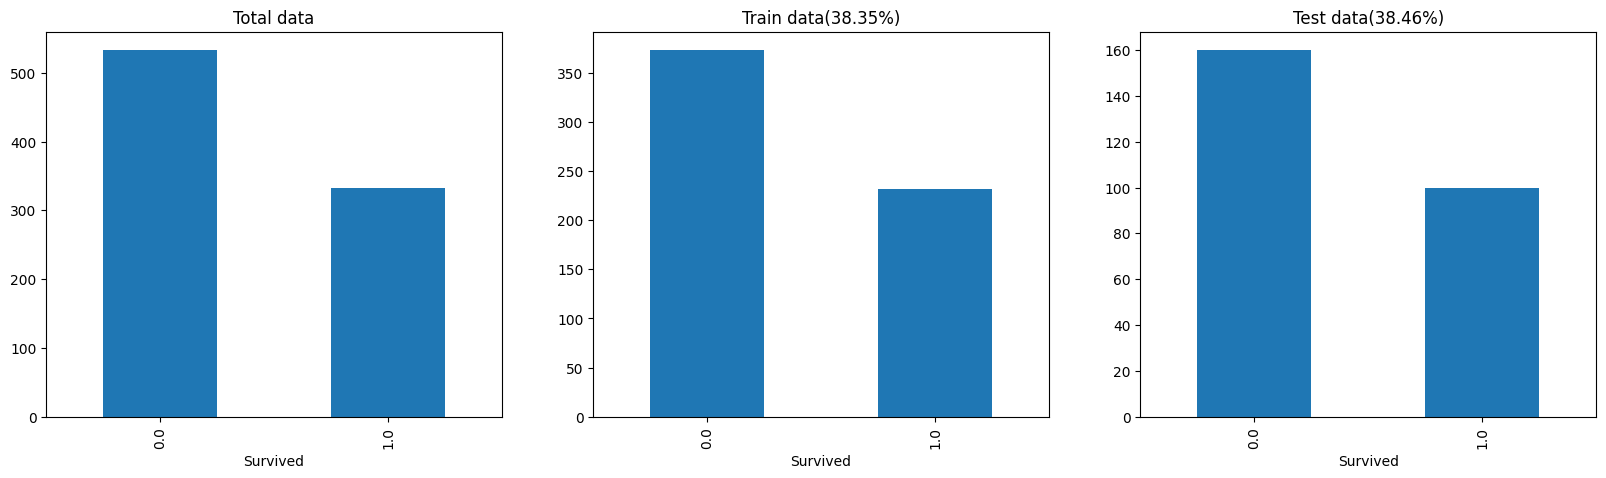

In [914]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.title('Total data')
y.value_counts().plot(kind='bar')
plt.subplot(1, 3, 2)
plt.title(f'Train data({100*y_train.sum()/y_train.shape[0]:.2f}%)')
y_train.value_counts().plot(kind='bar')
plt.subplot(1, 3, 3)
plt.title(f'Test data({100*y_test.sum()/y_test.shape[0]:.2f}%)')
y_test.value_counts().plot(kind='bar')

In [915]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0.0,3.0,22.000000,1.0,7.2500,1.0,0.0,1.0
1,2,1.0,1.0,38.000000,1.0,65.6563,0.0,0.0,0.0
2,3,1.0,3.0,26.000000,0.0,7.9250,0.0,0.0,1.0
3,4,1.0,1.0,35.000000,1.0,53.1000,0.0,0.0,1.0
4,5,0.0,3.0,35.000000,0.0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,887,0.0,2.0,27.000000,0.0,13.0000,1.0,0.0,1.0
887,888,1.0,1.0,19.000000,0.0,30.0000,0.0,0.0,1.0
888,889,0.0,3.0,29.892266,1.0,23.4500,0.0,0.0,1.0
889,890,1.0,1.0,26.000000,0.0,30.0000,1.0,0.0,0.0
